In [18]:
# 1) Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [22]:
# 2) Load the Dataset
# Make sure your dataset file is named "car.csv" or "car.data" and is in the same folder as this notebook

df = pd.read_csv("car_evaluation.csv", header=None)

# If dataset has no headers, assign standard column names
df.columns = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "class"]

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (1728, 7)


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [24]:
# 3) Encode Categorical Columns using LabelEncoder
le = LabelEncoder()

for col in df.columns:
    df[col] = le.fit_transform(df[col])

df.head()


,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


In [26]:
# 4) Split Data — Predict 'safety'
X = df.drop(columns=["safety"])   # Features
y = df["safety"]                  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [28]:
# 5) Train the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [30]:
# 6) Evaluate the Model
y_pred = rf.predict(X_test)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy: 0.3208092485549133

Classification Report:
               precision    recall  f1-score   support

           0       0.33      0.32      0.33       115
           1       0.40      0.49      0.44       115
           2       0.19      0.16      0.17       116

    accuracy                           0.32       346
   macro avg       0.31      0.32      0.31       346
weighted avg       0.31      0.32      0.31       346



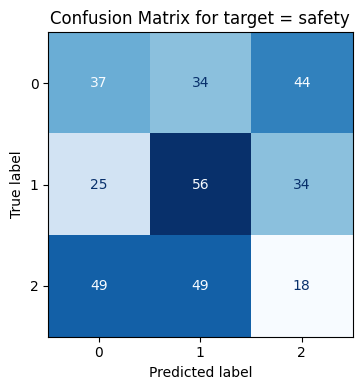

In [36]:
# 9) Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_train))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_train))
fig, ax = plt.subplots(figsize=(5,4))
disp.plot(ax=ax, cmap="Blues", values_format="d", colorbar=False)
plt.title(f"Confusion Matrix for target = {TARGET}")
plt.tight_layout()
plt.show()
